# 二次元双曲幾何

Poincare ball モデルを考える

In [1]:
import numpy as np


def _dot(u,v, axis=-1):
    return np.sum(u*v, axis=axis, keepdims=True)

def _delta(u,v, axis=-1):
    return 2 * _dot(u-v, u-v, axis=axis) / ((1-_dot(u,u, axis))*(1-_dot(v,v, axis)))

def dist(u,v, axis=-1):
    u = np.asarray(u)
    v = np.asarray(v)
    return np.arccosh(1+_delta(u,v, axis=axis))
    
def translate(v,x, axis=-1):
    v = np.asarray(v)
    x = np.asarray(x)
    return ((1+2*_dot(v,x,axis)+_dot(x,x,axis))*v + (1-_dot(v,v,axis))*x) / (1+2*_dot(v,x,axis)+_dot(v,v,axis)*_dot(x,x,axis))


In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def circplot():
    t = np.linspace(0,np.pi*2, 1025)
    plt.plot(np.cos(t), np.sin(t), color="gray", lw=.5)
    plt.xlim(-1.05, 1.05)
    plt.ylim(-1.05, 1.05)
    

<IPython.core.display.Javascript object>


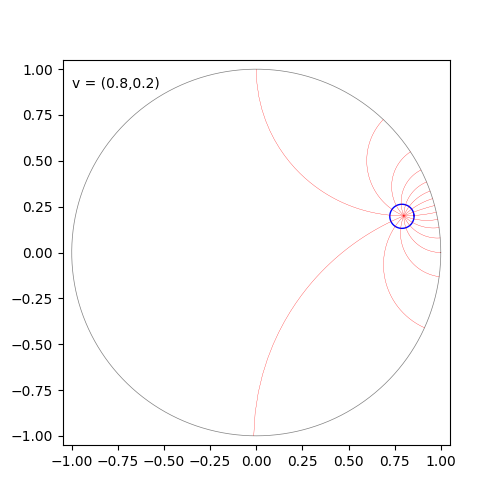

Text(-1,0.9,'v = (0.8,0.2)')

In [5]:

plt.figure(figsize=(5,5))
circplot()


t = np.linspace(0,2*np.pi, 1025)

circ =  0.2*np.array([np.cos(t), np.sin(t)]).T

th = np.linspace(0,np.pi, 8, endpoint=False)
direc = np.array([np.cos(th), np.sin(th)]).T
lines = np.linspace(-1,1, 100)[None,:,None] * direc[:,None,:]

#plt.plot(circ[:,0], circ[:,1], "blue")

#v = [0,0]
v = [0.8,0.2]

t_circ = translate(v,circ)
t_lines = translate(v, lines)


plt.plot(t_circ[:,0], t_circ[:,1], "blue", lw=1)
for i in range(t_lines.shape[0]):
    plt.plot(t_lines[i,:,0], t_lines[i,:,1], color="red", lw=0.2)
    
plt.text(-1,0.9, "v = ({},{})".format(*v))

In [79]:
# たくさん描く

M=30
vx = np.concatenate([
    np.linspace(0.0,0.7, M),
    np.linspace(0.7,0.7, M),
    np.linspace(0.7,0.0, M),
    0.7*np.cos(np.linspace(np.pi/2,np.pi, M)),
    np.linspace(-0.7,0.0, M),
] )
vy = np.concatenate([
    np.linspace(0.0,0.0, M),
    np.linspace(0.0,0.7, M),
    np.linspace(0.7,0.7, M),
    0.7*np.sin(np.linspace(np.pi/2,np.pi, M)),
    np.linspace(0.0,0.0, M),
])

vs = np.array([vx,vy]).T


def draw(i):
    v = vs[i % len(vs)]
    
    t = np.linspace(0,2*np.pi, 1025)
    rs = np.arange(1, 10)*0.1
    circ =  np.array([np.cos(t), np.sin(t)]).T
    circs =  rs[:,None,None] * circ[None,:,:]

    th = np.linspace(0,np.pi, 16, endpoint=False)
    direc = np.array([np.cos(th), np.sin(th)]).T
    lines = np.linspace(-1,1, 257)[None,:,None] * direc[:,None,:]

    #ax.plot(circ[:,0], circ[:,1], "blue")

    t_circs = translate(v,circs)
    t_lines = translate(v, lines)


    plt.cla()
    circplot()
    for i in range(t_circs.shape[0]):
        plt.plot(t_circs[i,:,0], t_circs[i,:,1], "blue", lw=0.5)
    for i in range(t_lines.shape[0]):
        plt.plot(t_lines[i,:,0], t_lines[i,:,1], color="red", lw=0.2)

    plt.text(-1,0.9, "v = ({:0.2f},{:0.2f})".format(*v))
    
    

<IPython.core.display.Javascript object>


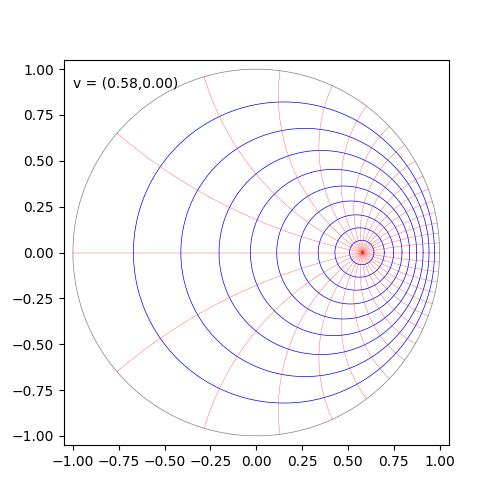

In [80]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(xlim=(-1,1), ylim=(-1,1))
ax.set_aspect('equal')

draw(15)


In [81]:

animation.FuncAnimation(fig, draw, interval=100)

In [82]:


plt.show()